<a href="https://colab.research.google.com/github/HugoKD/ML/blob/main/SoutenanceMAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problème de regression, à partir des features on doit predire 4 targets possibles (y1,y2,y3,y4)

#Data Analyses + Preprocessing

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [102]:
X = pd.read_csv("data_Features.csv").drop("time", axis=1)
y = pd.read_csv("data_Targets.csv")[["Y1"]]

In [103]:
y.info(), X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y1      2556 non-null   int64
dtypes: int64(1)
memory usage: 20.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t2m     2556 non-null   float64
 1   u10     2556 non-null   float64
 2   v10     2556 non-null   float64
 3   SST     2556 non-null   float64
 4   SIC     2556 non-null   float64
 5   r1_MAR  2556 non-null   float64
 6   r2_MAR  2556 non-null   float64
 7   r3_MAR  2556 non-null   float64
 8   r4_MAR  2556 non-null   float64
 9   r5_MAR  2556 non-null   float64
dtypes: float64(10)
memory usage: 199.8 KB


(None, None)

In [104]:
print(y.Y1.describe())
## More than 75% of data is null ..

count    2556.000000
mean        3.525430
std        18.977537
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       433.000000
Name: Y1, dtype: float64


In [105]:
## Step 1 : See how the label are distributed bc we will have to transform them
## Step 2  : See the skewness of features -> huge impact on model performance

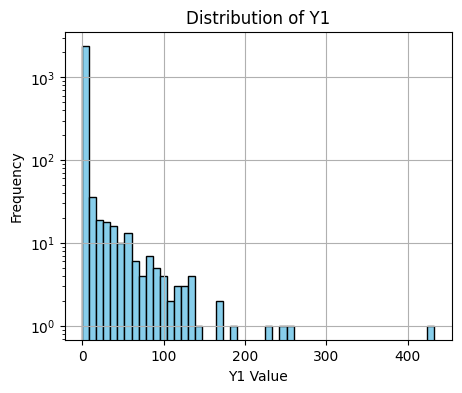

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.hist(y, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Y1')
plt.xlabel('Y1 Value')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True)
plt.show()

In [107]:
## Choix du threshold

In [108]:
nbr0 = y.value_counts()[0]/len(y)
print(nbr0) #8849765258215962

0.8849765258215962


In [109]:
#Conversion des données
threshold =  y.Y1.mean()
labels = y.Y1.apply(lambda x : 0 if x<=0 else 1)
print(labels)

0       0
1       0
2       0
3       0
4       0
       ..
2551    1
2552    0
2553    0
2554    0
2555    0
Name: Y1, Length: 2556, dtype: int64


In [110]:
## Données largement désiquilibrées
# Data Augmentation

88% de nos données sont à 0, le choix du threshold serait donc {y<=0} = 0, {y>0} = 1

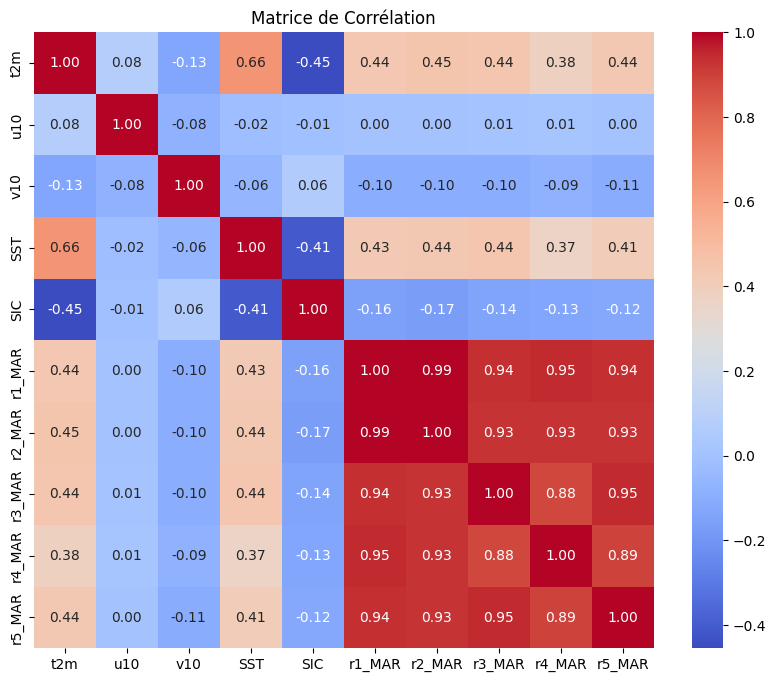

In [111]:
#Matrice de corrélation

plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

In [112]:
##Possibilité de se limiter à 1 Ri_MAR au vu de la forte corrélation entre ces variables
##Possibilité de réduire la dimension de l'espace des variables aussi

In [113]:
## Problème sur les var : t2M,SIC et toutes les ri_MAR

In [ ]:
## On peut se limiter à max min, box cox, et log transformation pour normalsier les données

In [ ]:
## Important de distinguer les valeurs abérantes des valeurs normalements sur abondante -> on ne veut pas changer la distribution non plus

In [ ]:
## Ce sera sans doute un ensemble model qui sera le plus puissant

In [ ]:
## Faire un cas simple, type RF

In [114]:
X_transform = X.drop(['r5_MAR','r3_MAR','r4_MAR','r2_MAR'],axis = 1)

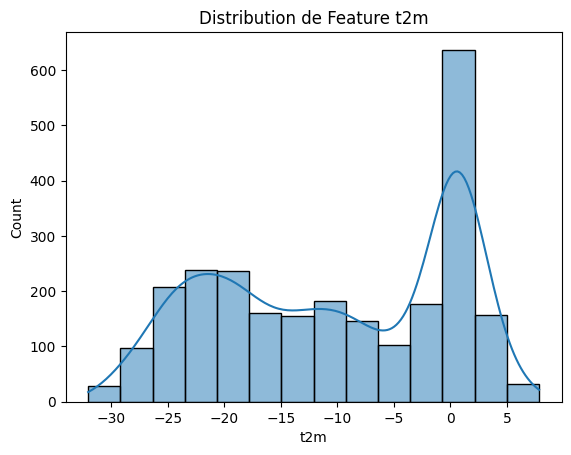

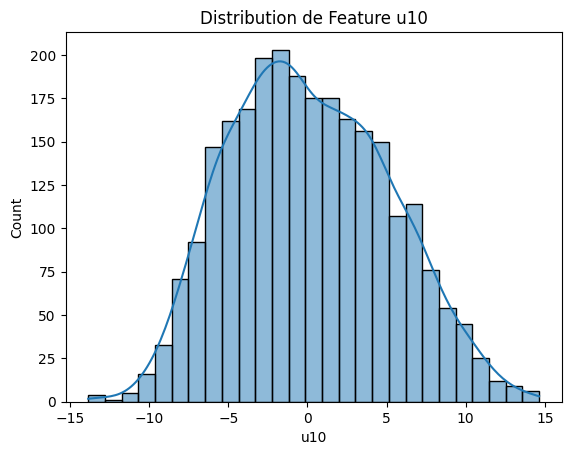

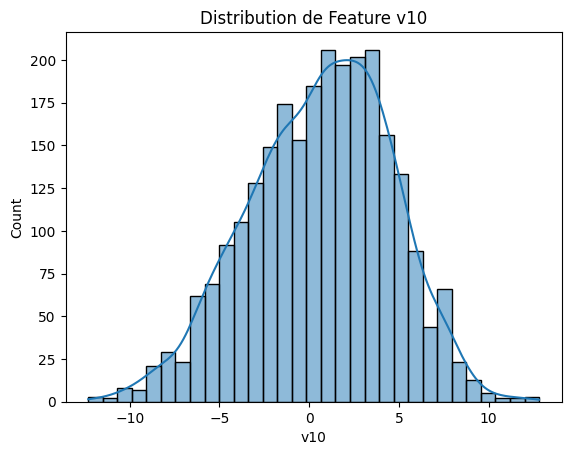

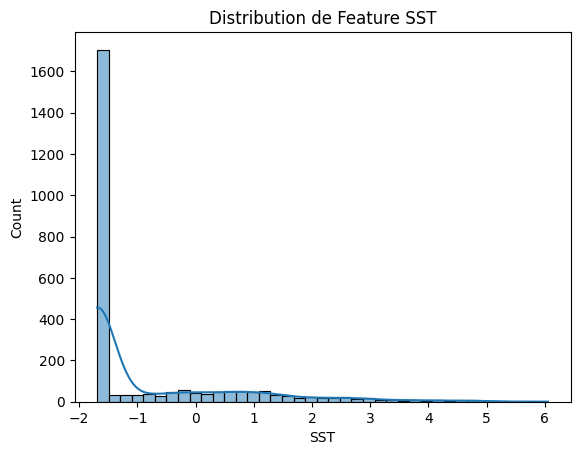

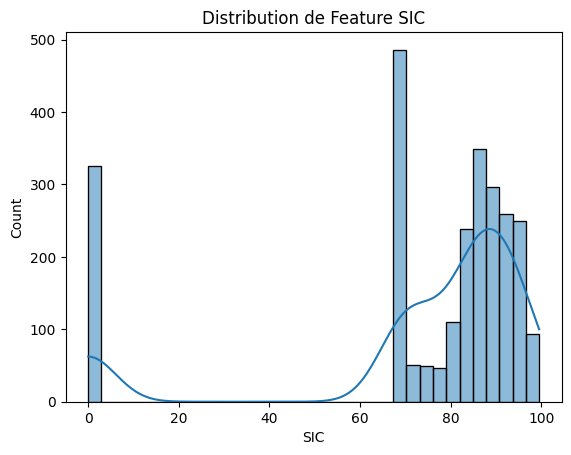

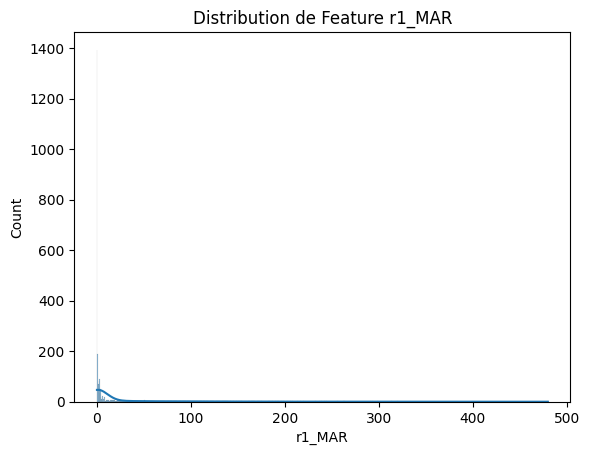

In [115]:
for c in (X_transform.columns):
    sns.histplot(X[c], kde=True)
    plt.title('Distribution de Feature' +' ' + str(c))
    plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='r1_MAR', ylabel='Count'>

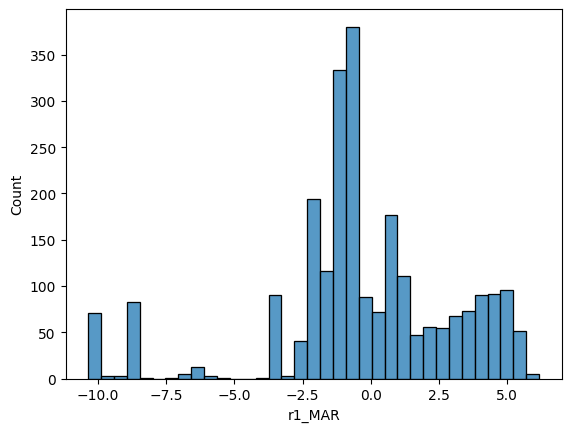

In [140]:
sns.histplot(np.log(X['r1_MAR']))

<Axes: ylabel='Count'>

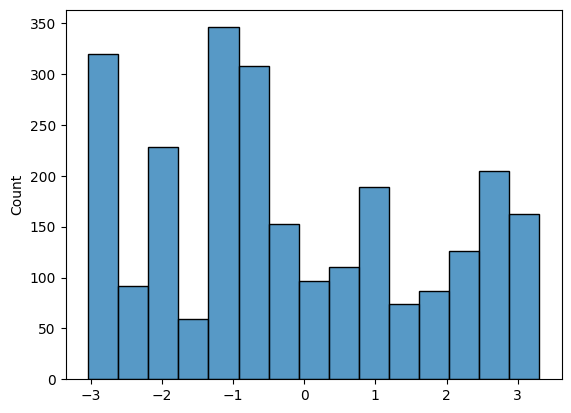

In [176]:
X_r1_MAR_boxcox = stats.boxcox(X['r1_MAR']+0.1)[0]
sns.histplot(X_r1_MAR_boxcox) #box plot semble plus puissant

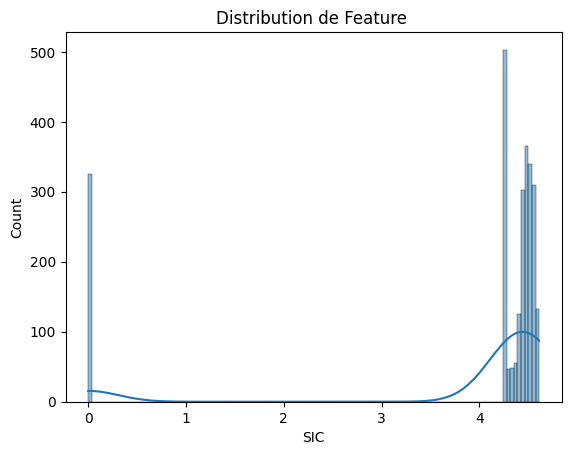

In [157]:
X_log_SIC = np.log(X['SIC'] + 1)
sns.histplot(X_log_SIC, kde=True)
plt.title('Distribution de Feature' +' ' )
plt.show()

<Axes: ylabel='Count'>

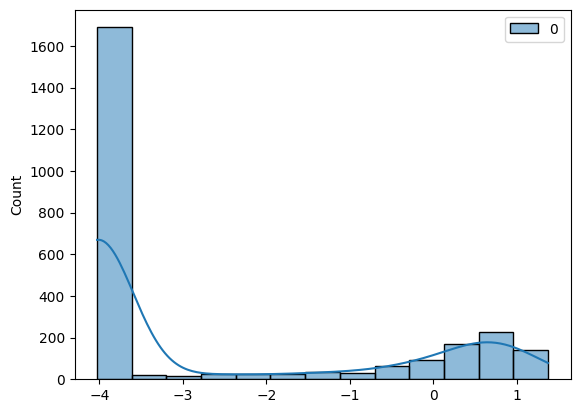

In [190]:
X_SST_YeoJohson = pd.DataFrame(stats.yeojohnson(X['SST'])[0])
sns.histplot(X_SST_YeoJohson, kde=True)

In [191]:
print(X_SST_YeoJohson.describe())
print(X.SST.describe())

                 0
count  2556.000000
mean     -2.654035
std       2.014133
min      -4.026569
25%      -4.016339
50%      -4.016339
75%      -0.361048
max       1.375180
count    2556.000000
mean       -0.858922
std         1.446165
min        -1.692462
25%        -1.689860
50%        -1.689860
75%        -0.297573
max         6.054536
Name: SST, dtype: float64


In [169]:
print(X_transform[["SIC"]].describe())
print(X_log_SIC.describe())

               SIC
count  2556.000000
mean     73.267808
std      29.250724
min       0.000000
25%      70.000000
50%      84.601769
75%      90.362319
max      99.500682
count    2556.000000
mean        3.871875
std         1.481721
min         0.000000
25%         4.262680
50%         4.449706
75%         4.514833
max         4.610165
Name: SIC, dtype: float64


In [177]:
X_transform['SIC'] = X_log_SIC
X_transform['r1_MAR'] = X_r1_MAR_boxcox

In [182]:
from scipy.stats import skew

skewness_stats = X.apply(lambda x: skew(x))

# Affichage sous forme de tableau
skewness_df = pd.DataFrame({
    'Value': skewness_stats
})

skewness_df

,Value
t2m,-0.200338
u10,0.199832
v10,-0.240307
SST,1.814089
SIC,-1.873792
r1_MAR,3.482891
r2_MAR,3.567807
r3_MAR,3.052087
r4_MAR,4.152768
r5_MAR,2.961569


On voit que les features (t2m, u10, et v10) ne nécessite pas énormement de transformations. Au contraire celle de SIC possède une légère asymetrie vers la gauche (long tail à gauche) et mériterai Une transformation comme celle de Yeo-Johnson ou une transformation Box-Cox inversée pourrait être utile ici.De même les variables ri_MAr ainsi que SST on une asymetrie vers la droite, une transformation logarithmique ou box Cox pourrait donc être adaptée.

In [ ]:
#Exemple de combinaison de différentes combinaisons pour diff features
'''
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Définir les transformations pour chaque feature
preprocessor = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p), ['feature1']),
        ('boxcox', PowerTransformer(), ['feature2']),
        ('standard', StandardScaler(), ['feature3']),
        ('minmax', MinMaxScaler(), ['feature4']),
    ]
)'''

#Modele training

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
tree = DecisionTreeClassifier()

tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)